In [13]:
%pylab inline
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import urllib
import json

Populating the interactive namespace from numpy and matplotlib


# Use AI to Color the Image

In [6]:
r = requests.post(
    "https://api.deepai.org/api/colorizer",
    files={
        'image': open('10.jpg', 'rb'),
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)
print(r.json())

{'id': '788c6c50-d5bd-4085-97d6-00bfe5a7a794', 'output_url': 'https://api.deepai.org/job-view-file/788c6c50-d5bd-4085-97d6-00bfe5a7a794/outputs/output.jpg'}


# Download the Image From the AI URL

In [11]:
colored_image = 'kingdom.jpg'
urllib.request.urlretrieve(url, colored_image)

('kingdom.jpg', <http.client.HTTPMessage at 0x20b4066ceb0>)

# Take A Look At the Image

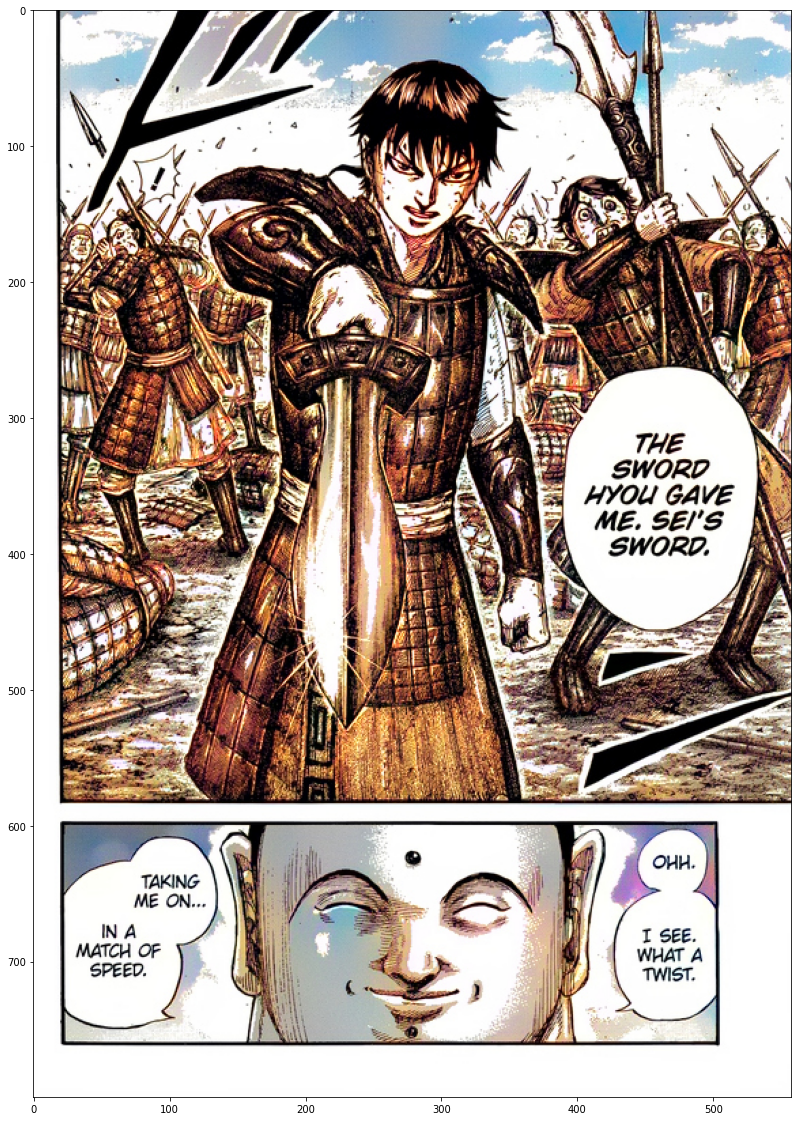

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
img = mpimg.imread(colored_image)
imgplot = plt.imshow(img)
plt.show()

# Test Pixel Color

In [15]:
colors = PIL.Image.open(colored_image)
colors_rgb = colors.convert("RGB")

In [17]:
width, height = colors.size
print(width, height)

558 800
